In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print(type(iris_dataset))
print("Keys of iris_dataset\n", iris_dataset.keys())
print("Feature names:\n", iris_dataset.feature_names)
print("Target names:\n", iris_dataset.target_names)
print("Type of data:\n", type(iris_dataset.data))
print("Shape of data:\n", iris_dataset.data.shape)
print("First 5 rows of data:\n", iris_dataset.data[:5])
print("Type of target:\n", type(iris_dataset.target))
print("Shape of target:\n", iris_dataset.target.shape)
print("First 5 rows of target:\n", iris_dataset.target[:5])

<class 'sklearn.utils.Bunch'>
Keys of iris_dataset
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:
 ['setosa' 'versicolor' 'virginica']
Type of data:
 <class 'numpy.ndarray'>
Shape of data:
 (150, 4)
First 5 rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Type of target:
 <class 'numpy.ndarray'>
Shape of target:
 (150,)
First 5 rows of target:
 [0 0 0 0 0]


In [16]:
from sklearn.model_selection import train_test_split

# random data splitting
X_train, X_test, y_train, y_test  = train_test_split(iris_dataset.data, iris_dataset.target, test_size=0.2, random_state=0)

# Stratified data splitting
# X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, test_size=0.2, random_state=0, stratify=pd.DataFrame(iris_dataset.target))

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

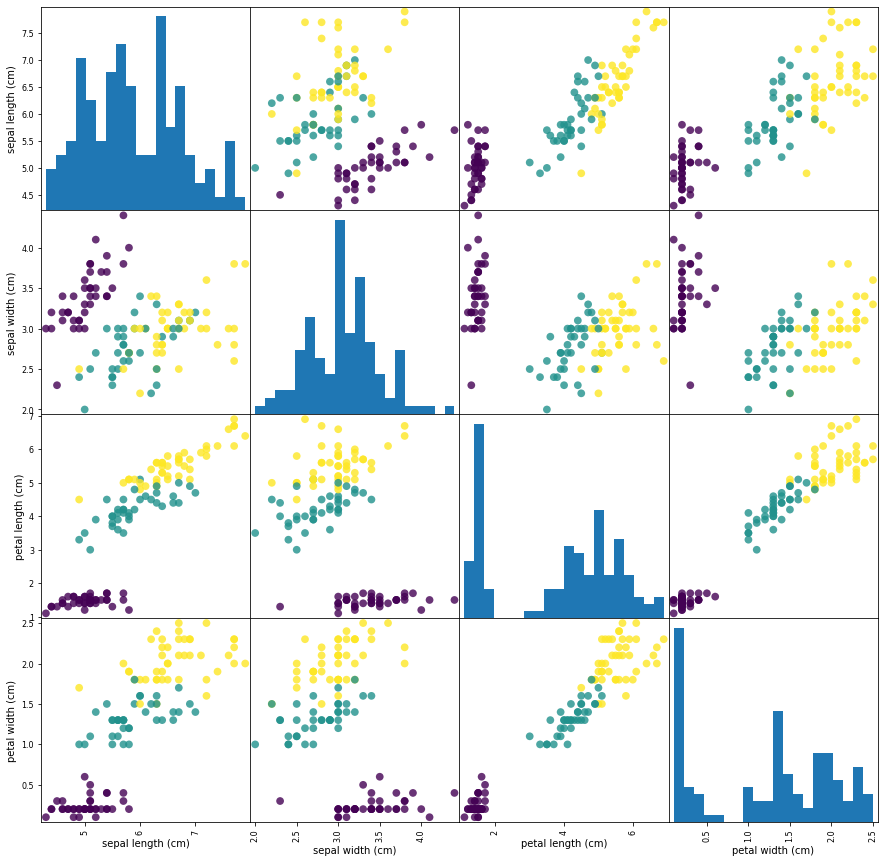

In [17]:
# Create dataframe from data in X_train, by labelling the columns
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# Create a scatter matrix from the dataframe, color by y_train, with marker as sphere
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, marker="o", figsize=(15, 15), hist_kwds={"bins":20}, s=60, alpha=0.8)

Text(0.5, 0, 'Label')

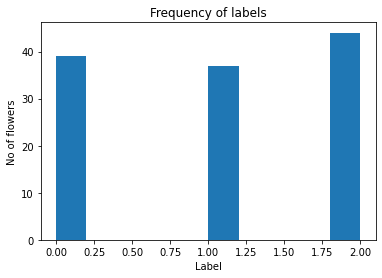

In [18]:
fig, ax = plt.subplots()
ax.hist(y_train)
ax.set_title("Frequency of labels")
ax.set_ylabel("No of flowers")
ax.set_xlabel("Label")

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
# Predicting label for a single domain set
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print(prediction)
print(iris_dataset.target_names[prediction])

[0]
['setosa']


In [23]:
y_pred = knn.predict(X_test)
print("Test set prediction", y_pred)

Test set prediction [2 1 0 2 0 2 0 1 1 1 2 1 1 1 2 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [25]:
# Manually checking error
wrong_predictions = 0
for i in range(len(y_pred)):
  if y_pred[i] != y_test[i]:
    wrong_predictions+=1

error = (wrong_predictions/len(y_pred))*100
print("Error:", error)
print("Accuracy:", 100 - error)

Error: 3.3333333333333335
Accuracy: 96.66666666666667


In [27]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
Test set score: 0.97
